Data Preprocessing

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv('Position_Salaries.csv')
# we only take second column i.e Level which corresponds to the Position
X = dataset.iloc[:, -2].values
y = dataset.iloc[:, -1].values

# need to convert X and y to 2D array since the feature scaling function expects a 2D array as input
X = X.reshape(-1,1)
y = y.reshape(-1,1)

# we have to apply feature since there is an implicit relation bw feature variables & dependent variables
# the levels go from 1 to 10 and we need to bring it to a common scale
# we will apply scaling on both feature and dependent variables
# we create two obj of StandardScalar class since the mean and SD wil vary for both columns
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

print(X)         # values bw -2 and +2
print(y)         # values bw -1 and +3

# we do not split into training and test set since data is less and we want to include most of it for training
# we will the model later to predict salary for a random level value

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


---

Training SVR model on the whole set

In [20]:
from sklearn.svm import SVR

# we use radial basis function kernel, since our dataset has non-linear relationship (read more about these)
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

SVR()

---

Predicting a new result

In [25]:
# we need to transform 6.5 using sc_X to get it on the same scale
svr_pred_scaled = regressor.predict(sc_X.transform([[6.5]]))

# we need to inversely transform the scaled predicted y(salary) using sc_y
svr_pred = sc_y.inverse_transform(svr_pred_scaled)
print(svr_pred)

[170370.0204065]


---

Visualizing the SVR results

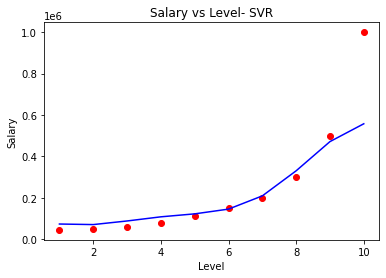

In [34]:
# we inversely transform X and y to get actual/real values on the graph and not the scaled ones
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')

# we get scaled values in terms of sc_y from regressor.predict(), so we need to inversely transform them to get actual y values
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color='blue')

plt.title('Salary vs Level- SVR')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

Visualizing the SVR results for a higher resolution

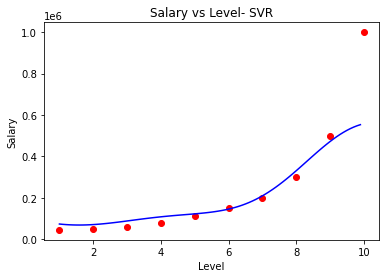

In [43]:
# X_grid will have the min to max of actual X values at an interval of 0.1 ie. 0, 0.1, 0.2.... 9.8, 9.9, 10
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape(-1,1)

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')

# we need scale X_grid back with sc_X since we had inversely transformed earlier
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color='blue')

plt.title('Salary vs Level- SVR')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()